### Analysis of Deaf Schools in America, 2026

In [15]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from sklearn.neighbors import NearestNeighbors

##### Data load

In [2]:
schools = pd.read_csv('../data/deaf_schools/clean/deaf_schools2026.csv',index_col=False)

In [3]:
schools.head()

,name,yr_est,yrs_opr,address,city,state,zip,mascot,gr_served,day_or_res,website,lat,long
0,Alabama Institute for the Deaf and Blind,1858,168,205 South Street East,Talladega,Alabama,35160,Silent Warriors,PreK-12,Residential,https://www.aidb.org,33.43083,-86.0992
1,Alaska State School for the Deaf and Hard of H...,1973,53,5530 E Northern Lights Blvd,Anchorage,Alaska,99504,Seals,PreK-12,Residential,https://www.asdk12.org/aksdhh,61.19399,-149.7750
2,American School for the Deaf,1817,209,139 North Main Street,West Hartford,Connecticut,06107,Tigers,K-12,Residential,http://www.asd-1817.org/,41.77111,-72.7471
3,Arizona State Schools for the Deaf and Blind,1912,114,1200 W Speedway Blvd,Tucson,Arizona,85745,Sentinels,PreK-12,Residential,https://asdb.az.gov/tucsoncampus/,32.23709,-110.9900
4,Arkansas School for the Deaf,1849,177,2400 W Markham St,Little Rock,Arkansas,72205,Leopards,PreK-12,Residential,https://asd.ade.arkansas.gov/,34.75164,-92.2978


##### Basic EDA

##### Nearest Neighbor Search

In [4]:
# lat/long to Points
geometry = [Point(xy) for xy in zip(schools['long'], schools['lat'])]

In [5]:
# geopandas dataframe
gdf = gpd.GeoDataFrame(schools, geometry=geometry)

In [6]:
# set coordinate ref system to WGS84
gdf.set_crs("EPSG:4326", allow_override=True, inplace=True)

,name,yr_est,yrs_opr,address,city,state,zip,mascot,gr_served,day_or_res,website,lat,long,geometry
0,Alabama Institute for the Deaf and Blind,1858,168,205 South Street East,Talladega,Alabama,35160,Silent Warriors,PreK-12,Residential,https://www.aidb.org,33.43083,-86.0992,POINT (-86.0992 33.43083)
1,Alaska State School for the Deaf and Hard of H...,1973,53,5530 E Northern Lights Blvd,Anchorage,Alaska,99504,Seals,PreK-12,Residential,https://www.asdk12.org/aksdhh,61.19399,-149.7750,POINT (-149.775 61.19399)
2,American School for the Deaf,1817,209,139 North Main Street,West Hartford,Connecticut,06107,Tigers,K-12,Residential,http://www.asd-1817.org/,41.77111,-72.7471,POINT (-72.7471 41.77111)
3,Arizona State Schools for the Deaf and Blind,1912,114,1200 W Speedway Blvd,Tucson,Arizona,85745,Sentinels,PreK-12,Residential,https://asdb.az.gov/tucsoncampus/,32.23709,-110.9900,POINT (-110.99 32.23709)
4,Arkansas School for the Deaf,1849,177,2400 W Markham St,Little Rock,Arkansas,72205,Leopards,PreK-12,Residential,https://asd.ade.arkansas.gov/,34.75164,-92.2978,POINT (-92.2978 34.75164)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,West Virginia Schools for the Deaf and Blind,1870,156,301 East Main Street,Romney,West Virginia,26757,Lions,PreK-12,Residential,https://www.wvsdb2.state.k12.wv.us/,39.34160,-78.7520,POINT (-78.752 39.3416)
67,Western Pennsylvania School for the Deaf,1869,157,300 East Swissvale Avenue,Edgewood,Pennsylvania,15218,Lions,PreK-12,Residential,https://www.wpsd.org/,40.43457,-79.8815,POINT (-79.8815 40.43457)
68,West Tennessee School for the Deaf,1986,40,100 Berryhill Drive,Jackson,Tennessee,38301,Eagles,PreK-6,Day,https://www.tsdeaf.org/apps/pages/WTSD,35.64632,-88.7887,POINT (-88.7887 35.64632)
69,Willie Ross School for the Deaf,1967,59,32 Norway Street,Longmeadow,Massachusetts,01106,NaN,PreK-12,Day,https://www.wrsdeaf.org/,42.03104,-72.5782,POINT (-72.5782 42.03104)


In [7]:
# nearest neighbor search
coords = gdf.geometry.apply(lambda x: (x.x, x.y)).tolist()
nn = NearestNeighbors(n_neighbors=2)
nn.fit(coords)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",2
,"radius radius: float, default=1.0Range of parameter space to use by default for :meth:`radius_neighbors`queries.",1.0
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"p p: float (positive), default=2Parameter for the Minkowski metric fromsklearn.metrics.pairwise.pairwise_distances. When p = 1, this isequivalent to using manhattan_distance (l1), and euclidean_distance(l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.",2
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None


In [8]:
# find NNs
distances, indices = nn.kneighbors(coords)

In [9]:
# add indices/distances of NN
schools['nearest_neighbor_index'] = indices[:, 1]
schools['nearest_distance'] = distances[:, 1]

In [14]:
print(schools[['lat', 'long', 'nearest_neighbor_index', 'nearest_distance']])

         lat      long  nearest_neighbor_index  nearest_distance
0   33.43083  -86.0992                      14          1.002768
1   61.19399 -149.7750                      65         31.285011
2   41.77111  -72.7471                      69          0.309985
3   32.23709 -110.9900                      48          1.719376
4   34.75164  -92.2978                      34          3.224103
..       ...       ...                     ...               ...
66  39.34160  -78.7520                      64          1.231295
67  40.43457  -79.8815                      66          1.571736
68  35.64632  -88.7887                       0          3.484509
69  42.03104  -72.5782                       2          0.309985
70  42.63381  -88.6561                      19          3.310660

[71 rows x 4 columns]


##### Visualizations

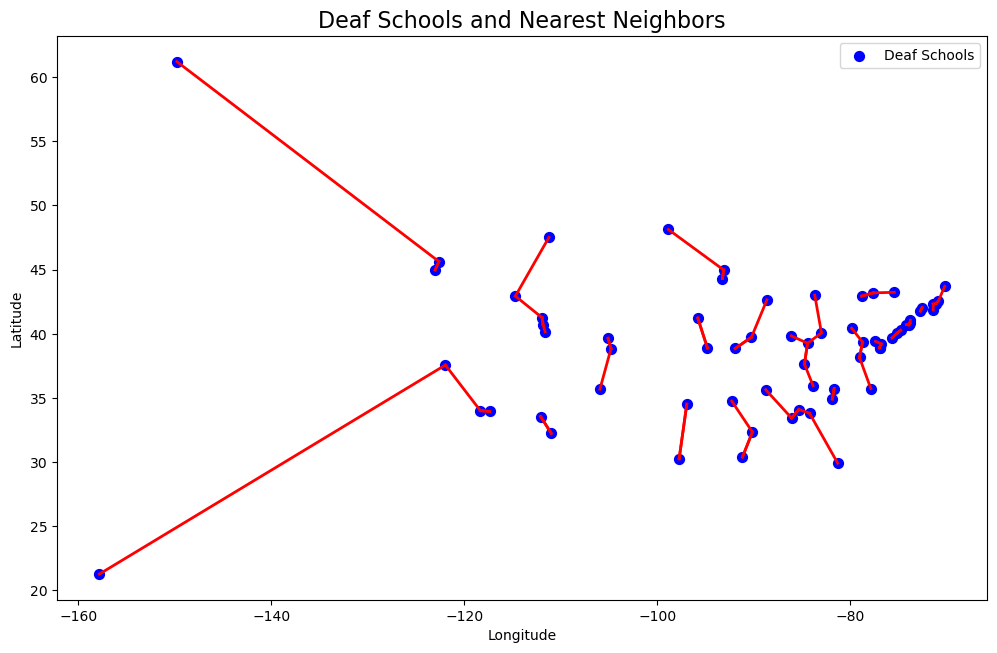

In [22]:
# NN visualization
fig, ax = plt.subplots(figsize=(12, 8))
gdf.plot(ax=ax, color='blue', markersize=50, label="Deaf Schools")

for i, row in schools.iterrows():
    nn_index = row['nearest_neighbor_index']
    if nn_index != i:
        nn_point = schools.iloc[nn_index]
        ax.plot([row['long'], nn_point['long']], [row['lat'], 
                 nn_point['lat']], color='red', linewidth=2)
        
ax.set_title("Deaf Schools and Nearest Neighbors", fontsize=16)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.legend()

plt.show()